# Forecasting Assignment

### Data Set - Airlines_data

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
passengers_data = pd.read_excel('Airlines+Data.xlsx')
passengers_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# 3. Data Understanding

## 3.1 Initial Analysis :

In [3]:
passengers_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
passengers_data.shape

(96, 2)

In [5]:
passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
passengers_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
passengers_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
passengers_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
passengers_data.columns

Index(['Month', 'Passengers'], dtype='object')

In [10]:
passengers_data.set_index('Month', inplace = True)
passengers_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## 3.2 Visualization using Lineplot for Passengers :

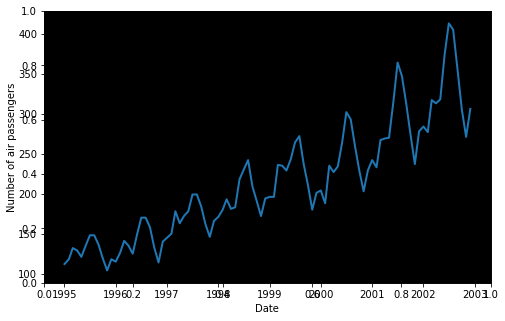

In [11]:
plt.figure(figsize = (8,5))

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")

plt.plot(passengers_data['Passengers'], linewidth = 2)

plt.show()

## 3.3 Visualization using Histogram :

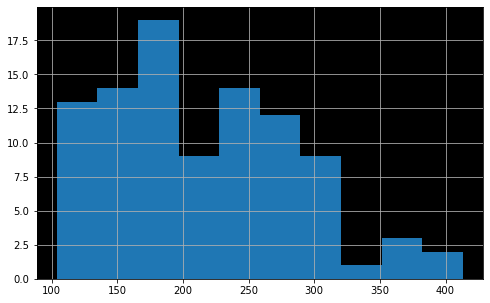

In [12]:
ax = plt.axes()
ax.set_facecolor("black")

passengers_data['Passengers'].hist(figsize = (8,5))

plt.show()

## 3.4 Visualization using Lagplot :

In [13]:
from pandas.plotting import lag_plot

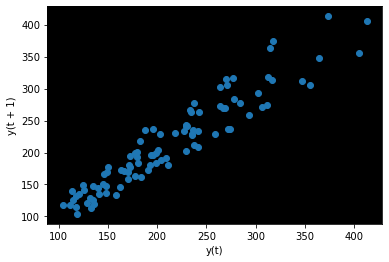

In [14]:
ax = plt.axes()
ax.set_facecolor("black")

lag_plot(passengers_data['Passengers'])

plt.show()

## 3.5 Visualization using TSA Plot :

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots

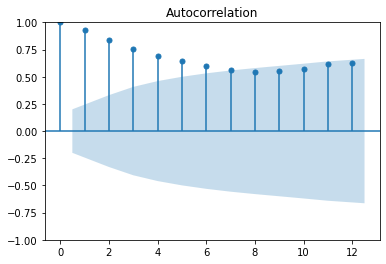

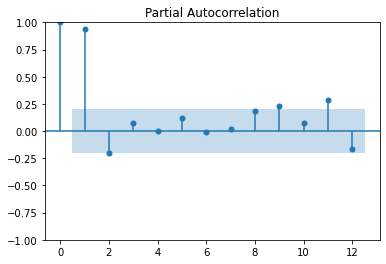

In [16]:
tsa_plots.plot_acf(passengers_data['Passengers'],lags = 12)

tsa_plots.plot_pacf(passengers_data['Passengers'],lags = 12)

plt.show()

# 4. Data Driven Forecasting Methods

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## 4.1 Splitting Data :

In [18]:
Train = passengers_data.head(84)
Test = passengers_data.tail(12)

## 4.2 Moving Average Method :

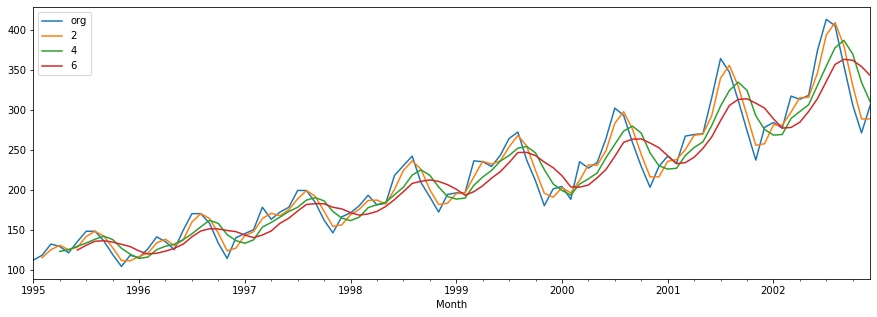

In [19]:
plt.figure(figsize = (15,5))
passengers_data['Passengers'].plot(label = "org")

for i in range(2,8,2):
    passengers_data['Passengers'].rolling(i).mean().plot(label = str(i))
    
plt.legend(loc = 'best')
plt.show()

# 5. Time series decomposition plot 

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

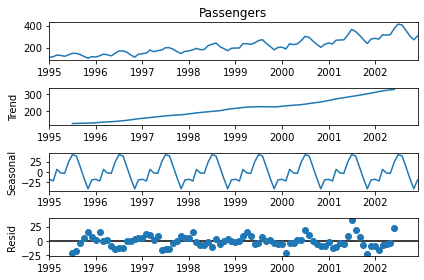

In [21]:
ts_decompose = seasonal_decompose(passengers_data.Passengers,period = 12)
ts_decompose.plot()
plt.show()

# 6. Evaluation Metric RMSE

In [22]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [23]:
import warnings
warnings.filterwarnings('ignore')

## 6.1 Simple Exponential Method :

In [24]:
simple_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_simple_model = simple_model.predict(start = Test.index[0],end = Test.index[-1])

In [25]:
rmse_simple_model = RMSE(Test.Passengers, pred_simple_model)
print('RMSE Value of Simple Exponential :',rmse_simple_model)

RMSE Value of Simple Exponential : 68.00674031350329


## 6.2 Holt method :

In [26]:
holt_model = Holt(Train["Passengers"]).fit()
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [27]:
rmse_holt_model = RMSE(Test.Passengers, pred_holt_model)
print('RMSE Value of Holt :',rmse_holt_model)

RMSE Value of Holt : 58.56209934996357


## 6.3 Holts winter exponential smoothing with additive seasonality and additive trend :

In [28]:
holt_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [29]:
rmse_holt_add_add_model = RMSE(Test.Passengers, pred_holt_add_add)
print('RMSE Value of Holts add and add :',rmse_holt_add_add_model)

RMSE Value of Holts add and add : 63.07585545619695


## 6.4 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [30]:
holt_model_multi_add = ExponentialSmoothing(Train["Passengers"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])

In [31]:
rmse_holt_model_multi_add_model = RMSE(Test.Passengers, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',rmse_holt_model_multi_add_model)

RMSE Value of Holts Multi and add : 64.62220925087415


##### 

# 7. Model based Forecasting Methods

## 7.1 Data preprocessing for models :

In [32]:
passengers_data_1 = passengers_data.copy()
passengers_data_1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [33]:
passengers_data_1["t"] = np.arange(1,97)
passengers_data_1["t_squared"] = passengers_data_1["t"]*passengers_data_1["t"]

passengers_data_1["log_psngr"] = np.log(passengers_data_1["Passengers"])
passengers_data_1.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


## 7.2 Splitting data :

In [34]:
Train = passengers_data_1.head(84)
Test = passengers_data_1.tail(12)

## 7.3 Linear Model :

In [35]:
import statsmodels.formula.api as smf 

In [36]:
linear_model = smf.ols('Passengers~t',data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [37]:
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
print('RMSE Value of Linear :',rmse_linear_model)

RMSE Value of Linear : 53.19923653480267


## 7.4 Exponential Model :

In [38]:
Exp_model = smf.ols('log_psngr~t',data = Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))

In [39]:
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
print('RMSE Value of Exponential :',rmse_Exp_model)

RMSE Value of Exponential : 46.05736110315608


## 7.5 Quadratic Model 

In [40]:
Quad_model= smf.ols('Passengers~t+t_squared',data = Train).fit()
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_squared"]]))

In [41]:
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
print('RMSE Value of Quadratic :',rmse_Quad_model)

RMSE Value of Quadratic : 48.05188897933096


#### 

# 8. ARIMA model

In [42]:
series = passengers_data.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


## 8.1 Separate out a validation dataset :

In [43]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Dataset 84, Validation 12


## 8.2 Evaluate a Base model :

In [44]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
train = read_csv('dataset.csv', header = None, index_col = 0, parse_dates = True, squeeze = True)

In [46]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [47]:
print(train.shape)
print(test.shape)

(60,)
(24,)


## 8.3 Walk Farward Validation :

In [48]:
history = [x for x in train]
predictions = list()

In [49]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000


In [50]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE Value : %.3f' % rmse)

RMSE Value : 29.058


In [51]:
rmse_Persistence_model = 29.058

# 9. Conclusion

In [69]:
list = [['Simple Exponential Method',rmse_simple_model], ['Holt method',rmse_holt_model],
          ['Holt exp smoothing add',rmse_holt_add_add_model],['Holt exp smoothing multi',rmse_holt_model_multi_add_model],
          ['Linear Model',rmse_linear_model],['Exponential model',rmse_Exp_model],['Quadratic model',rmse_Quad_model],
          ['Persistence/ Base model', rmse_Persistence_model]]

In [70]:
df = pd.DataFrame(list, columns = ['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.562099
2,Holt exp smoothing add,63.075855
3,Holt exp smoothing multi,64.622209
4,Linear Model,53.199237
5,Exponential model,46.057361
6,Quadratic model,48.051889
7,Persistence/ Base model,29.058000


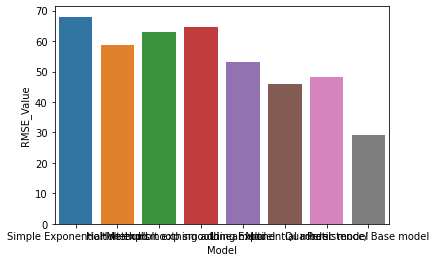

In [71]:
sns.barplot(data = df,x = 'Model',y = 'RMSE_Value')
plt.show()